# Tumblr Post Network Graphs
Replicating the Tumblr Labs Network Graphs using networkx.

By Q Chen and Stephanie Ye-Mowe

In [1]:
## Import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import string
import re

In [2]:
#url = "https://ask-united-mexican-states.tumblr.com/post/172782918073/me-on-personifications-i-like-to-explore-how" # Assigns variable "url" to post of interest's url

#url ="http://capdocq.tumblr.com/post/131195592968/stirringwind-real-smug-caryatid"

#url = "http://eurosong.tumblr.com/post/159712346913/good-afternoon-folks-and-welcome-to-todays"

url = "http://eurosong.tumblr.com/post/160511885918/good-afternoon-folks-and-welcome-to-todays"

urlhandle = (re.findall('http[s]*://[A-Za-z0-9-]+\.tumblr\.com/', url))[0] 

#op = "ask-united-mexican-states"
#op = "stirringwinds"
op = "eurosong"

html = urlopen(url)
content = BeautifulSoup(html,"html5lib")                               
sections2 = content.findAll("ol")
sections=sections2[0].findAll("li")

In [3]:
x= sections[-1].findAll("a")

while len(x)==1:
    y=str(x[0])
    y= (re.findall('notes/[0-9]+/[A-Za-z0-9]+\?from_c=[0-9]+', y))[0]
    nextpage= urlhandle+y
    
    html=urlopen(nextpage)
    content=BeautifulSoup(html,"html5lib")
    sectionsnext=content.findAll("li")
    
    if len(sectionsnext)>0:
        x=sectionsnext[-1].findAll("a")
        
        for i in range(len(sectionsnext)):
            sections.append(sectionsnext[i])
            
    else:
        x=[]
    
    continue 

In [4]:
reblogs=[]

for i in range(len(sections)):
    x=sections[i].findAll("a") 
    if len(x)>2:
        row=[]
        
        user=x[1].get_text()
        link=x[1].attrs['href']
        
        user2=x[2].get_text()
        link2=x[2].attrs['href']
        
        row.append(user)
        row.append(link)
        row.append(user2)
        row.append(link2)
        
        if len(x)>3:
            comment = x[3].get_text()
            comment= re.sub('\n+', " ", comment) #Removes excess new line characters                           
            comment = re.sub(' +', " ", comment) #Removes excess spaces   
            row.append(comment)
            
        else:
            row.append("")
        
        reblogs.append(row)
        
    else:
        continue

In [5]:
likes=[]

for i in range(len(sections)): # For each note in sections, use findAll() to locate all content held within "a" tags
    x=sections[i].findAll("a") # If each note had two strings held within "a" tags, it is a like. If it has three, it is a reblog. If it has four, it is a reblog with a comment.
    if len(x) ==2: 
        row=[]                      
        
        user=x[1].get_text() # Removes html formatting code; the result is the username of the individual liking the post
        link=x[1].attrs['href'] # Finds Tumblr url of the person liking the post 
        
        row.append(user)
        row.append(link)
        
        likes.append(row)
        
    else:
        continue

In [6]:
df_reblog=pd.DataFrame(reblogs)
df_likes=pd.DataFrame(likes)

In [7]:
for i in range(len(reblogs)):
    reblogs[i].append(1)
    x=0
        
    for t in range(len(likes)):
    
        if reblogs[i][1]== likes[t][1]:
            x=1
            del likes[t]
            break
            
        else:
            continue 
            
    
    reblogs[i].append(x)

In [8]:
for i in range(len(likes)):
   
    likes[i].append(op)
    likes[i].append("Poster Url")
    likes[i].append("")
    likes[i].append(0)
    likes[i].append(1)
    
    reblogs.append(likes[i])

In [9]:
df_network=pd.DataFrame(reblogs)
df_network.columns = ["target", "target URL", "source", "source URL", "comment", "reblog", "like"]

columns = ["target URL", "source URL"]
df_network.drop(columns, inplace=True, axis=1)


df = df_network.reindex_axis(["comment", "reblog", "like", "target", "source"], axis=1)
df

,comment,reblog,like,target,source
0,,1,0,iriaowillwinesc,arabela25
1,,1,0,xiithdoctor,mapsontheweb
2,,1,0,adventurenerd,clickthing
3,,1,1,slenderboobs,mapsontheweb
4,,1,0,wherethefuckdidthisshitcomefrom,mapsontheweb
5,,1,0,magrittesflamingtuba,mapsontheweb
6,,1,0,thatdysfunctionalkingdom,mapsontheweb
7,@ph0220,1,1,monterrang-parkin,mapsontheweb
8,,1,1,wymanthewalrus,mapsontheweb
9,,1,1,alwaysfriedstudent-b07d5fd2,eurosong


In [10]:
## Create network graph
g = nx.from_pandas_edgelist(df, 'source', 'target', ['like', 'reblog', 'comment'])

In [11]:
#k = list(nx.connected_component_subgraphs(g))[0]

In [12]:
## Create opnode and others nodelists
opnode = []
others = []

for node in g.nodes():
    if node == op:
        opnode.append(node)
    else:
        others.append(node)

opnode

['eurosong']

In [13]:
## Create edgelists
bothlist = []
likelist = []
rebloglist = []


for (s,t,d) in g.edges(data=True):
    if d['like'] == 1 and d['reblog'] == 1:
        bothlist.append((s,t,d))
    elif d['like'] == 1:
        likelist.append((s,t,d))
    elif d['reblog'] == 1:
        rebloglist.append((s,t,d))
    else:
        print('no style')

print(bothlist)
print(likelist)
print(rebloglist)

[('mapsontheweb', 'slenderboobs', {'like': 1, 'reblog': 1, 'comment': ''}), ('mapsontheweb', 'monterrang-parkin', {'like': 1, 'reblog': 1, 'comment': ' @ph0220 '}), ('mapsontheweb', 'wymanthewalrus', {'like': 1, 'reblog': 1, 'comment': ''}), ('mapsontheweb', 'duksisdarker', {'like': 1, 'reblog': 1, 'comment': ''}), ('mapsontheweb', 'imarwood', {'like': 1, 'reblog': 1, 'comment': ''}), ('mapsontheweb', 'heirofavians', {'like': 1, 'reblog': 1, 'comment': ''}), ('eurosong', 'alwaysfriedstudent-b07d5fd2', {'like': 1, 'reblog': 1, 'comment': ''}), ('eurosong', 'mmarieto', {'like': 1, 'reblog': 1, 'comment': ''}), ('eurosong', 'portugalpirate', {'like': 1, 'reblog': 1, 'comment': ''}), ('eurosong', 'theportugueserevert', {'like': 1, 'reblog': 1, 'comment': ''}), ('eurosong', 'literallynotcoolirl', {'like': 1, 'reblog': 1, 'comment': ''}), ('eurosong', 'deathatintervals', {'like': 1, 'reblog': 1, 'comment': ''})]
[('eurosong', 'notacolorfullesbian', {'like': 1, 'reblog': 0, 'comment': ''}), (

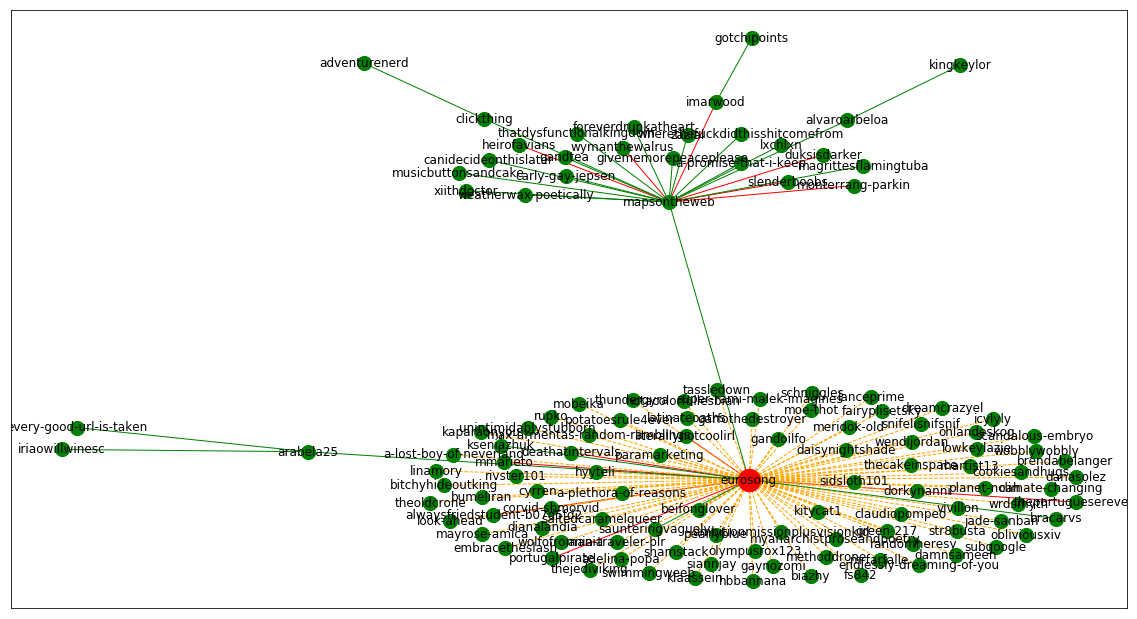

In [20]:
## define network layout
pos = nx.spring_layout(g)

## define figure size
plt.figure(figsize=(20,11))

## draw nodes
nx.draw_networkx_nodes(g, pos, nodelist = opnode, node_color = 'r', node_size = 500)
nx.draw_networkx_nodes(g, pos, nodelist = others, node_color = 'green', node_size = 200)

## draw edges by group
nx.draw_networkx_edges(g, pos, edgelist = bothlist, edge_color = 'r', style = 'solid', arrows = False)
nx.draw_networkx_edges(g, pos, edgelist = likelist, edge_color = 'orange', style = 'dashed', arrows = False)
nx.draw_networkx_edges(g, pos, edgelist = rebloglist, edge_color = 'g', style = 'solid', arrows = False)

## draw node labels
nx.draw_networkx_labels(g, pos)

## show drawing
plt.xticks([])
plt.yticks([])
plt.show()

In [86]:
def reblogsdeep(s,t):
    for path in nx.all_simple_paths(g, source=s, target=t):  
        print('Path: ', path)
        
        if len(path) == 2:
            for (se,te,de) in g.edges(data=True):
                if se == path[0] and te == path[1] and de['reblog'] == 0:
                    print(t,"has a 'like'-only relationship.")
        else:
            print(t,'is',(len(path)-1),'reblogs deep.')

In [89]:
s = op
t = 'kingkeylor'

reblogsdeep(s,t)

Path:  ['eurosong', 'mapsontheweb', 'alvaroarbeloa', 'kingkeylor']
kingkeylor is 3 reblogs deep


In [90]:
s = op
t = 'tassledown'

reblogsdeep(s,t)

Path:  ['eurosong', 'tassledown']
tassledown has a 'like'-only relationship.


In [91]:
g.degree('eurosong')

96

In [92]:
g.degree('mapsontheweb')

23